10# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [46]:
import pandas as pd

# load the training dataset
data = pd.read_csv('../data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,1
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415,1
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,1
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515,2
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

### Explore data

In [37]:
# Check missing values for each feature
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

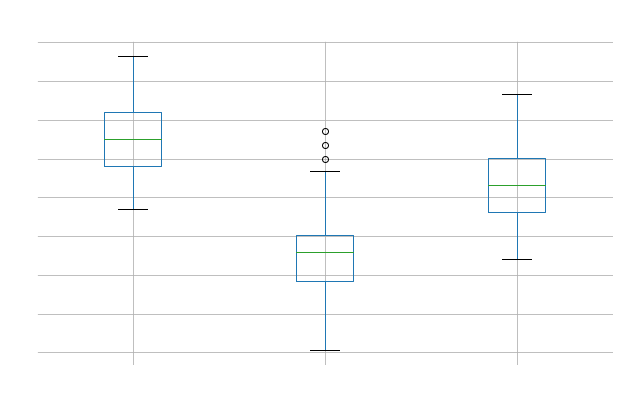

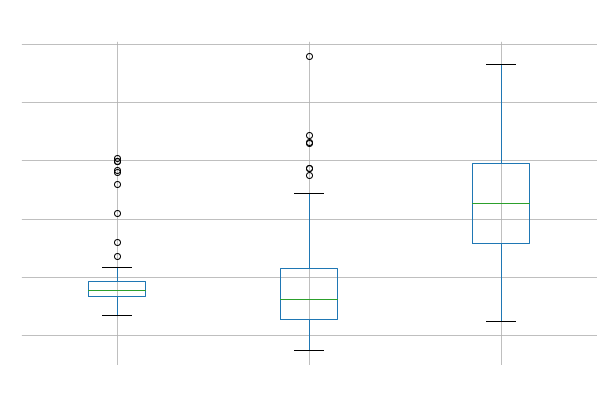

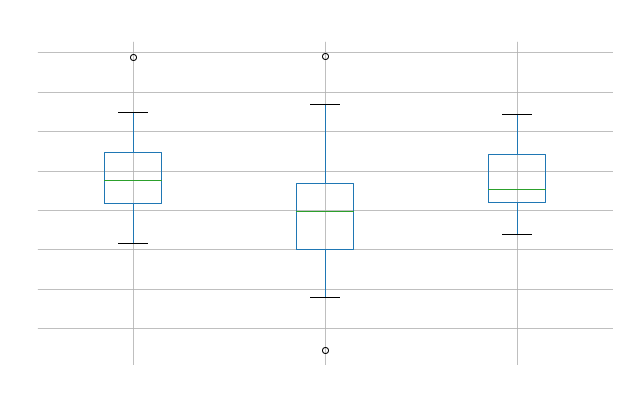

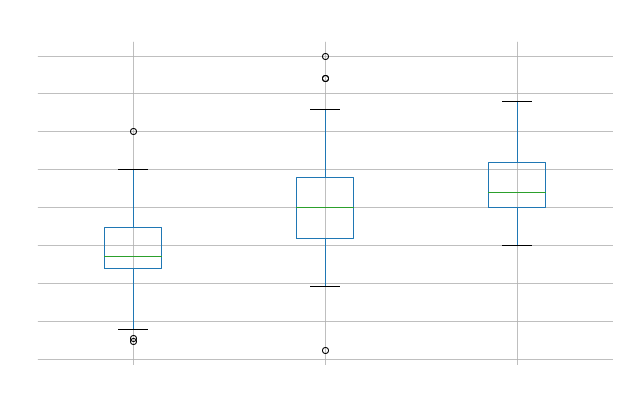

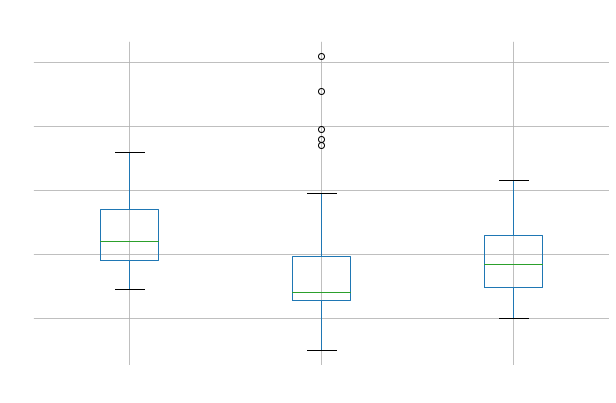

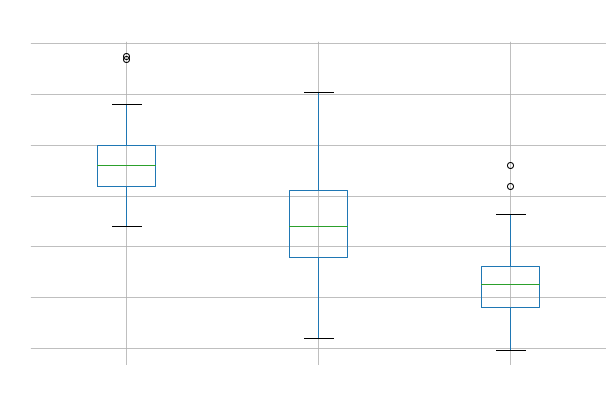

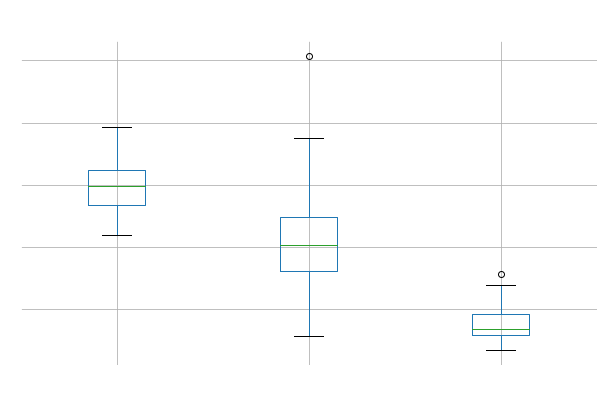

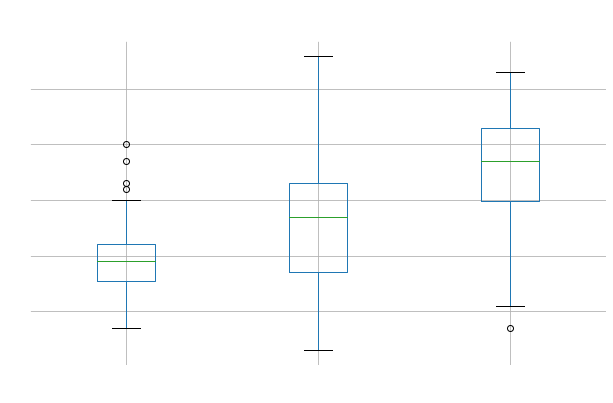

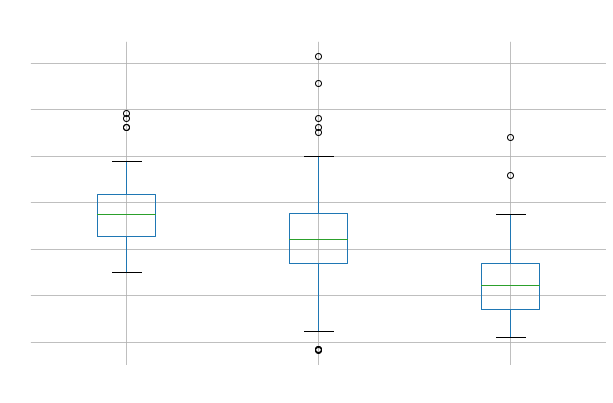

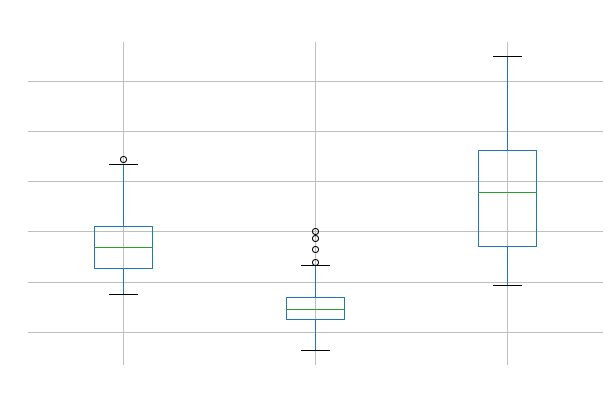

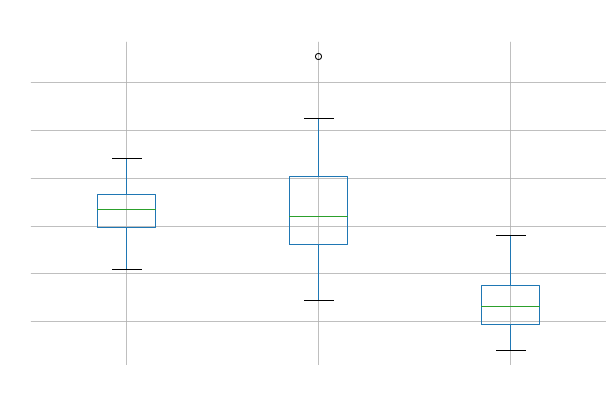

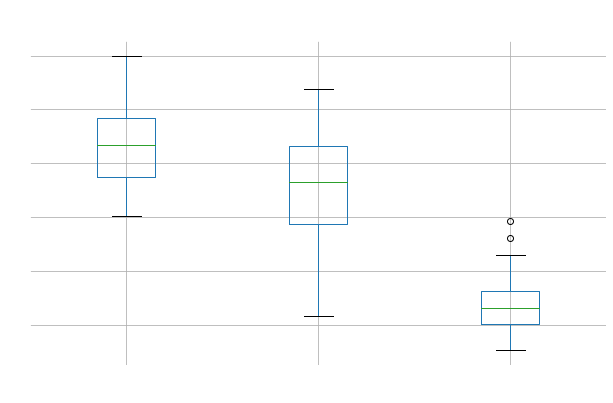

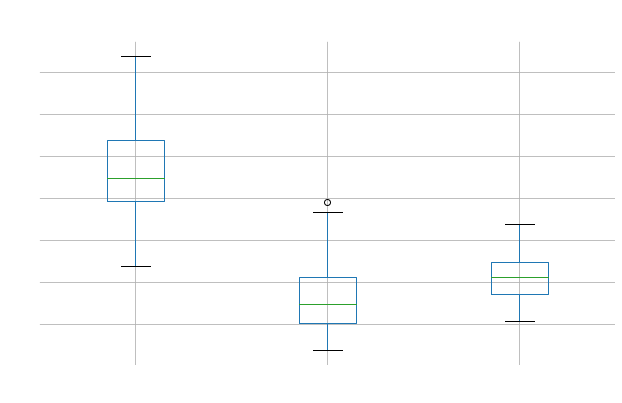

In [12]:
import matplotlib.pyplot as plt

params = {"text.color" : 'w'}
plt.rcParams.update(params)

for col in data.iloc[:, :-1].columns:
    data.boxplot(column=col, by='WineVariety', figsize=(10, 6))
    plt.title(col)

plt.show()

Each feature shows a pronounced effect on label. There are not many outliers. So we will include all the data points as
samples to train and test the model.

### Train the model

Preparations

In [35]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

from shared_code.utils import *


Training cases: 124
Testing cases: 54

----------------------------------------------------------------------------

Confusion Matrix:
 [[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]

Accuracy:  1.0

----------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

----------------------------------------------------------------------------



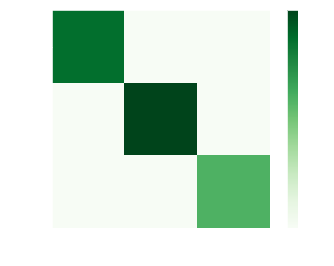

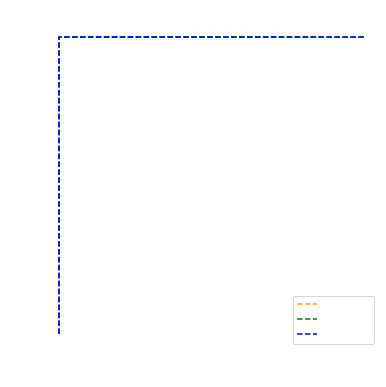

Average AUC:  1.0


In [70]:
# Split dataset into training and testing dataset
X = data.iloc[:, :-1]
y = data['WineVariety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print('Training cases: {}\nTesting cases: {}'.format(X_train.shape[0], X_test.shape[0]))
print('\n----------------------------------------------------------------------------\n')

# Normalize features, set model
numeric_features = [i for i in range(X_train.shape[1])]

# Initialize the model
reg = 0.01

# Create proprocessing and training pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000))
])

# Fit the pipeline to train the model
model = pipeline.fit(X_train, y_train)

# Predict the testing dataset
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Evaluate the predictions
cm = confusion_matrix(y_test, predictions)

print('Confusion Matrix:\n {}\n'.format(cm))
print('Accuracy: ', accuracy_score(y_test, predictions))
print('\n----------------------------------------------------------------------------\n')
print(classification_report(y_test, predictions))
print('----------------------------------------------------------------------------\n')

# Plot the confusion matrix with heatmap
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Greens)
plt.colorbar()
tick_marks = np.array(3)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

# Plot ROC Curve
y_classes = list(y.unique())
fpr = {}
tpr = {}
thresholds ={}

# Calculate ROC
for i in range(len(y_classes)):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_scores[:, i], pos_label=i)

# Plot the ROC chart
fig = plt.figure(figsize=(6, 6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=str(y_classes[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=str(y_classes[1])+ ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=str(y_classes[2])+ ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best',)
plt.show()

# Calculate AUC
auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
print('Average AUC: ', auc)

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [72]:
import joblib

# Save the model
filename = '../data/WineVariety.pkl'
joblib.dump(model, filename)

# load the model
saved_model = joblib.load('../data/WineVariety.pkl')

# import new features which need to be predicted
predict_object = pd.DataFrame([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                               [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print('New objects: {}'.format(predict_object.head(1)))

# predict new objects
new_predictions = model.predict(predict_object)
print('New class is {}'.format(new_predictions))

New objects:       0     1    2     3    4    5     6     7     8    9     10    11    12
0  13.72  1.43  2.5  16.7  108  3.4  3.67  0.19  2.04  6.8  0.89  2.87  1285
New class is [0 1]
